# ANDHRA PRADESH

In [22]:
import pandas as pd

# Load the datasets
df_enrolment = pd.read_csv('/content/Andhra Pradesh Enrolment Dataset.csv')
df_demographic = pd.read_csv('/content/Andhra Pradesh Demographic Dataset.csv')
df_biometric = pd.read_csv('/content/Andhra Pradesh Biometric Dataset.csv')

print("Andhra Pradesh Enrolment Dataset:")
print(df_enrolment.head())
print(df_enrolment.info())
print(df_enrolment.describe())

print("\nAndhra Pradesh Demographic Dataset:")
print(df_demographic.head())
print(df_demographic.info())
print(df_demographic.describe())

print("\nAndhra Pradesh Biometric Dataset:")
print(df_biometric.head())
print(df_biometric.info())
print(df_biometric.describe())

Andhra Pradesh Enrolment Dataset:
         date           state district  pincode  age_0_5  age_5_17  \
0  01-09-2025  Andhra Pradesh  Krishna   521215        3         2   
1  01-09-2025  Andhra Pradesh  Krishna   521235        3         0   
2  01-09-2025  Andhra Pradesh  Krishna   521263        1         0   
3  01-09-2025  Andhra Pradesh  Krishna   521301        3         1   
4  01-09-2025  Andhra Pradesh  Krishna   521332        1         0   

   age_18_greater  
0               0  
1               0  
2               0  
3               0  
4               0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            80374 non-null  object
 1   state           80374 non-null  object
 2   district        80374 non-null  object
 3   pincode         80374 non-null  int64 
 4   age_0_5         80374 non-null  int64 
 5   age_

In [23]:
df_enrolment['date'] = pd.to_datetime(df_enrolment['date'], format='%d-%m-%Y')
df_demographic['date'] = pd.to_datetime(df_demographic['date'], format='%d-%m-%Y')
df_biometric['date'] = pd.to_datetime(df_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_enrolment:")
print(df_enrolment.info())
print("\nData types after conversion for df_demographic:")
print(df_demographic.info())
print("\nData types after conversion for df_biometric:")
print(df_biometric.info())

Data types after conversion for df_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80374 entries, 0 to 80373
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            80374 non-null  datetime64[ns]
 1   state           80374 non-null  object        
 2   district        80374 non-null  object        
 3   pincode         80374 non-null  int64         
 4   age_0_5         80374 non-null  int64         
 5   age_5_17        80374 non-null  int64         
 6   age_18_greater  80374 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 4.3+ MB
None

Data types after conversion for df_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231428 entries, 0 to 231427
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           231428 non-null  date

In [24]:
merged_df_temp = pd.merge(df_enrolment, df_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged = pd.merge(merged_df_temp, df_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_merged[numeric_cols] = df_merged[numeric_cols].fillna(0)

print("Merged DataFrame (df_merged) head:")
print(df_merged.head())
print("\nMerged DataFrame (df_merged) info:")
print(df_merged.info())
df_ap = df_merged[df_merged['state'] == 'Andhra Pradesh'].copy()
df_ap['year'] = df_ap['date'].dt.year
df_ap['month'] = df_ap['date'].dt.month

print("Shape of df_ap:", df_ap.shape)
print("\nFirst 5 rows of df_ap with new 'year' and 'month' columns:")
print(df_ap.head())

Merged DataFrame (df_merged) head:
        date           state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Andhra Pradesh  Adilabad   504001      0.0       0.0   
1 2025-03-01  Andhra Pradesh  Adilabad   504001      0.0       0.0   
2 2025-03-01  Andhra Pradesh  Adilabad   504101      0.0       0.0   
3 2025-03-01  Andhra Pradesh  Adilabad   504101      0.0       0.0   
4 2025-03-01  Andhra Pradesh  Adilabad   504102      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0           15.0         350.0          55.0        287.0  
1             0.0           15.0         350.0          55.0        287.0  
2             0.0           10.0          51.0           0.0          0.0  
3             0.0           10.0          51.0           0.0          0.0  
4             0.0           16.0          71.0          20.0         41.0  

Merged DataFrame (df_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65

In [25]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_ap_agg = df_ap.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_ap_agg) head:")
print(df_ap_agg.head())
print("\nAggregated DataFrame (df_ap_agg) info:")
print(df_ap_agg.info())

Aggregated DataFrame (df_ap_agg) head:
   year  month           state               district  age_0_5  age_5_17  \
0  2025      3  Andhra Pradesh               Adilabad      0.0       0.0   
1  2025      3  Andhra Pradesh  Alluri Sitharama Raju      0.0       0.0   
2  2025      3  Andhra Pradesh             Anakapalli      0.0       0.0   
3  2025      3  Andhra Pradesh              Anantapur      0.0       0.0   
4  2025      3  Andhra Pradesh             Ananthapur      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0          457.0        5481.0        1000.0       4807.0  
1             0.0          408.0        3291.0         768.0       2099.0  
2             0.0          272.0        2061.0         233.0        292.0  
3             0.0          868.0       16988.0        3417.0       6685.0  
4             0.0         2143.0        7027.0       14548.0       2724.0  

Aggregated DataFrame (df_ap_agg) info:
<class '

In [26]:
import numpy as np

# 1. Create 'totalenrolments' column
df_ap_agg['totalenrolments'] = df_ap_agg['age_0_5'] + df_ap_agg['age_5_17'] + df_ap_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_ap_agg['childenrolments'] = df_ap_agg['age_0_5'] + df_ap_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_ap_agg['totaldemoupdates'] = df_ap_agg['demo_age_5_17'] + df_ap_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_ap_agg['totalbioupdates'] = df_ap_agg['bio_age_5_17'] + df_ap_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_ap_agg['CES'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['childenrolments'] / df_ap_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_ap_agg['DUR'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['totaldemoupdates'] / df_ap_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_ap_agg['BUR'] = np.where(
    df_ap_agg['totalenrolments'] == 0,
    0,
    df_ap_agg['totalbioupdates'] / df_ap_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_ap_agg) with new metrics head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with new metrics head:
   year  month           state               district  age_0_5  age_5_17  \
0  2025      3  Andhra Pradesh               Adilabad      0.0       0.0   
1  2025      3  Andhra Pradesh  Alluri Sitharama Raju      0.0       0.0   
2  2025      3  Andhra Pradesh             Anakapalli      0.0       0.0   
3  2025      3  Andhra Pradesh              Anantapur      0.0       0.0   
4  2025      3  Andhra Pradesh             Ananthapur      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0          457.0        5481.0        1000.0       4807.0   
1             0.0          408.0        3291.0         768.0       2099.0   
2             0.0          272.0        2061.0         233.0        292.0   
3             0.0          868.0       16988.0        3417.0       6685.0   
4             0.0         2143.0        7027.0       14548.0       2724.0   

   totalenrolments  chil

In [27]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_ap_agg['Enorm'] = df_ap_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_ap_agg['Dnorm'] = df_ap_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year' and 'state'
df_ap_agg['Bnorm'] = df_ap_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_ap_agg['stdnorm'] = (df_ap_agg['Enorm'] + df_ap_agg['Dnorm'] + df_ap_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_ap_agg['ALBI'] = 1 - df_ap_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_ap_agg['ALBI'] = df_ap_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_ap_agg) with normalized metrics and ALBI head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with normalized metrics and ALBI head:
   year  month           state               district  age_0_5  age_5_17  \
0  2025      3  Andhra Pradesh               Adilabad      0.0       0.0   
1  2025      3  Andhra Pradesh  Alluri Sitharama Raju      0.0       0.0   
2  2025      3  Andhra Pradesh             Anakapalli      0.0       0.0   
3  2025      3  Andhra Pradesh              Anantapur      0.0       0.0   
4  2025      3  Andhra Pradesh             Ananthapur      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...  \
0             0.0          457.0        5481.0        1000.0  ...   
1             0.0          408.0        3291.0         768.0  ...   
2             0.0          272.0        2061.0         233.0  ...   
3             0.0          868.0       16988.0        3417.0  ...   
4             0.0         2143.0        7027.0       14548.0  ...   

   totaldemoupdates  totalbioupdates  CES  DUR  BUR  Eno

In [28]:
df_ap_agg['Enormrisk'] = 1 - df_ap_agg['Enorm']
df_ap_agg['CESrisknorm'] = 1 - df_ap_agg['CES']
df_ap_agg['DURrisknorm'] = 1 - df_ap_agg['DUR']
df_ap_agg['BURrisknorm'] = 1 - df_ap_agg['BUR']
df_ap_agg['ALBIrisknorm'] = 1 - df_ap_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_ap_agg['riskscore'] = (
    df_ap_agg['Enormrisk'] +
    df_ap_agg['CESrisknorm'] +
    df_ap_agg['DURrisknorm'] +
    df_ap_agg['BURrisknorm'] +
    df_ap_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_ap_agg) with risk components and riskscore head:")
print(df_ap_agg.head())

Aggregated DataFrame (df_ap_agg) with risk components and riskscore head:
   year  month           state               district  age_0_5  age_5_17  \
0  2025      3  Andhra Pradesh               Adilabad      0.0       0.0   
1  2025      3  Andhra Pradesh  Alluri Sitharama Raju      0.0       0.0   
2  2025      3  Andhra Pradesh             Anakapalli      0.0       0.0   
3  2025      3  Andhra Pradesh              Anantapur      0.0       0.0   
4  2025      3  Andhra Pradesh             Ananthapur      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm  \
0             0.0          457.0        5481.0        1000.0  ...  0.130382   
1             0.0          408.0        3291.0         768.0  ...  0.081220   
2             0.0          272.0        2061.0         233.0  ...  0.051226   
3             0.0          868.0       16988.0        3417.0  ...  0.392069   
4             0.0         2143.0        7027.0       14548.0  ...  0.20134

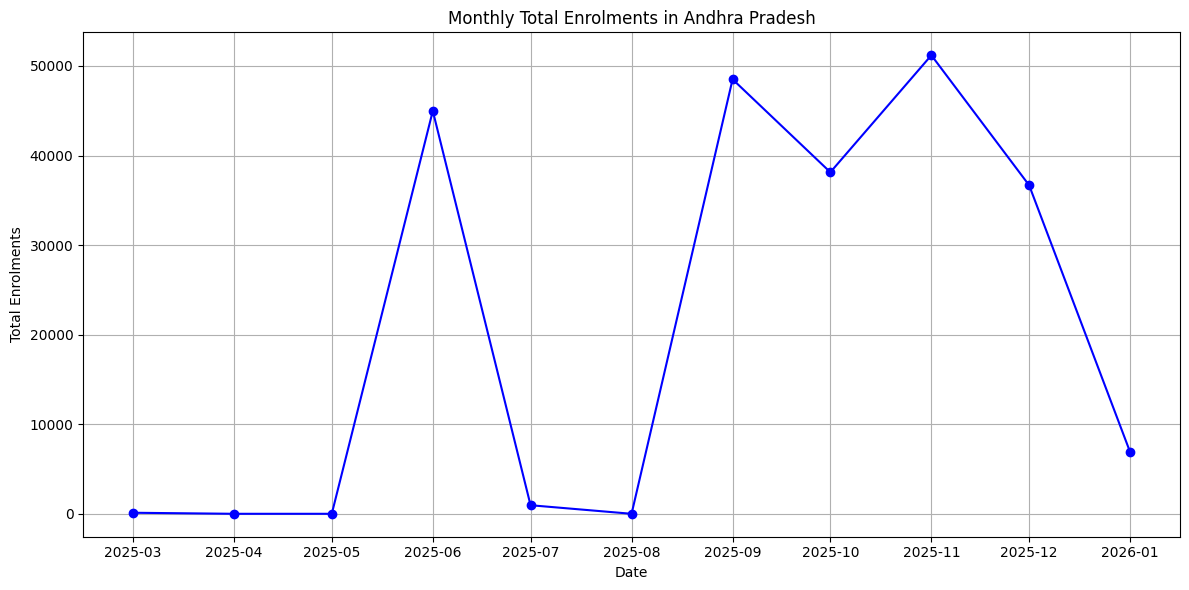

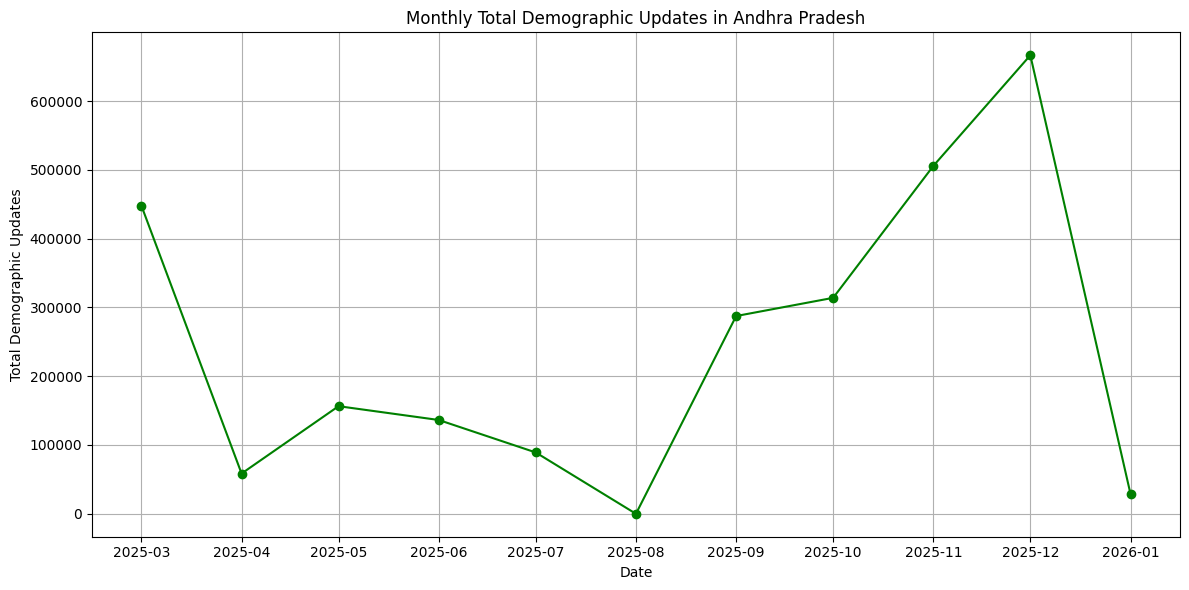

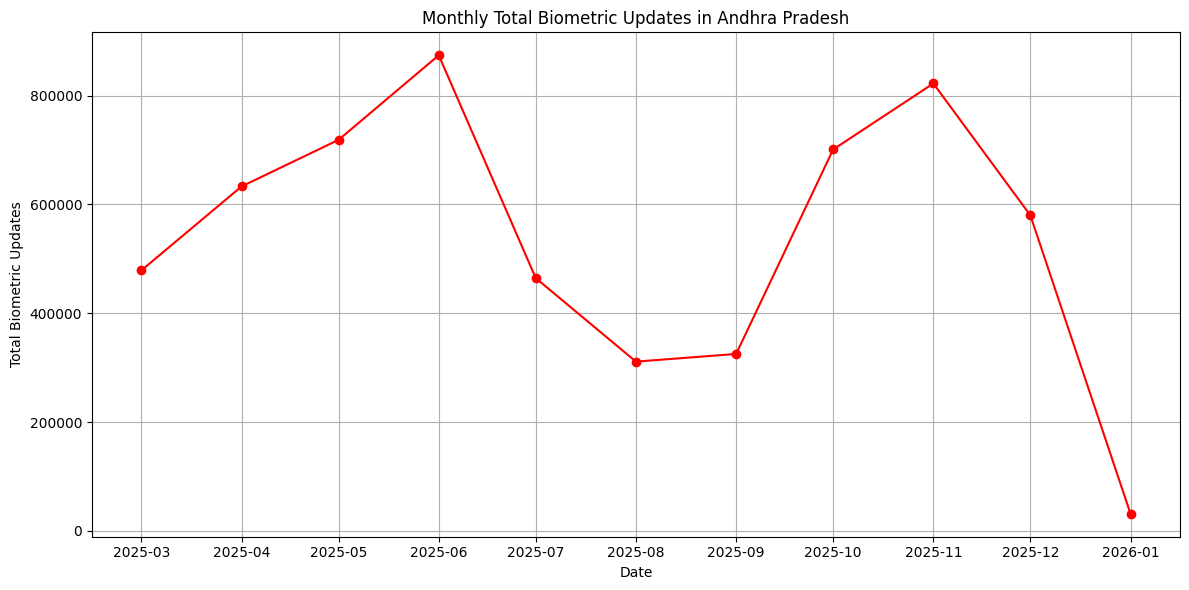

Monthly trend plots generated successfully.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
df_monthly_trends = df_ap_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_monthly_trends['date'] = pd.to_datetime(df_monthly_trends['year'].astype(str) + '-' + df_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_monthly_trends = df_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Andhra Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Andhra Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_trends['date'], df_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Andhra Pradesh')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**UNIVARIATE ANALYSIS**

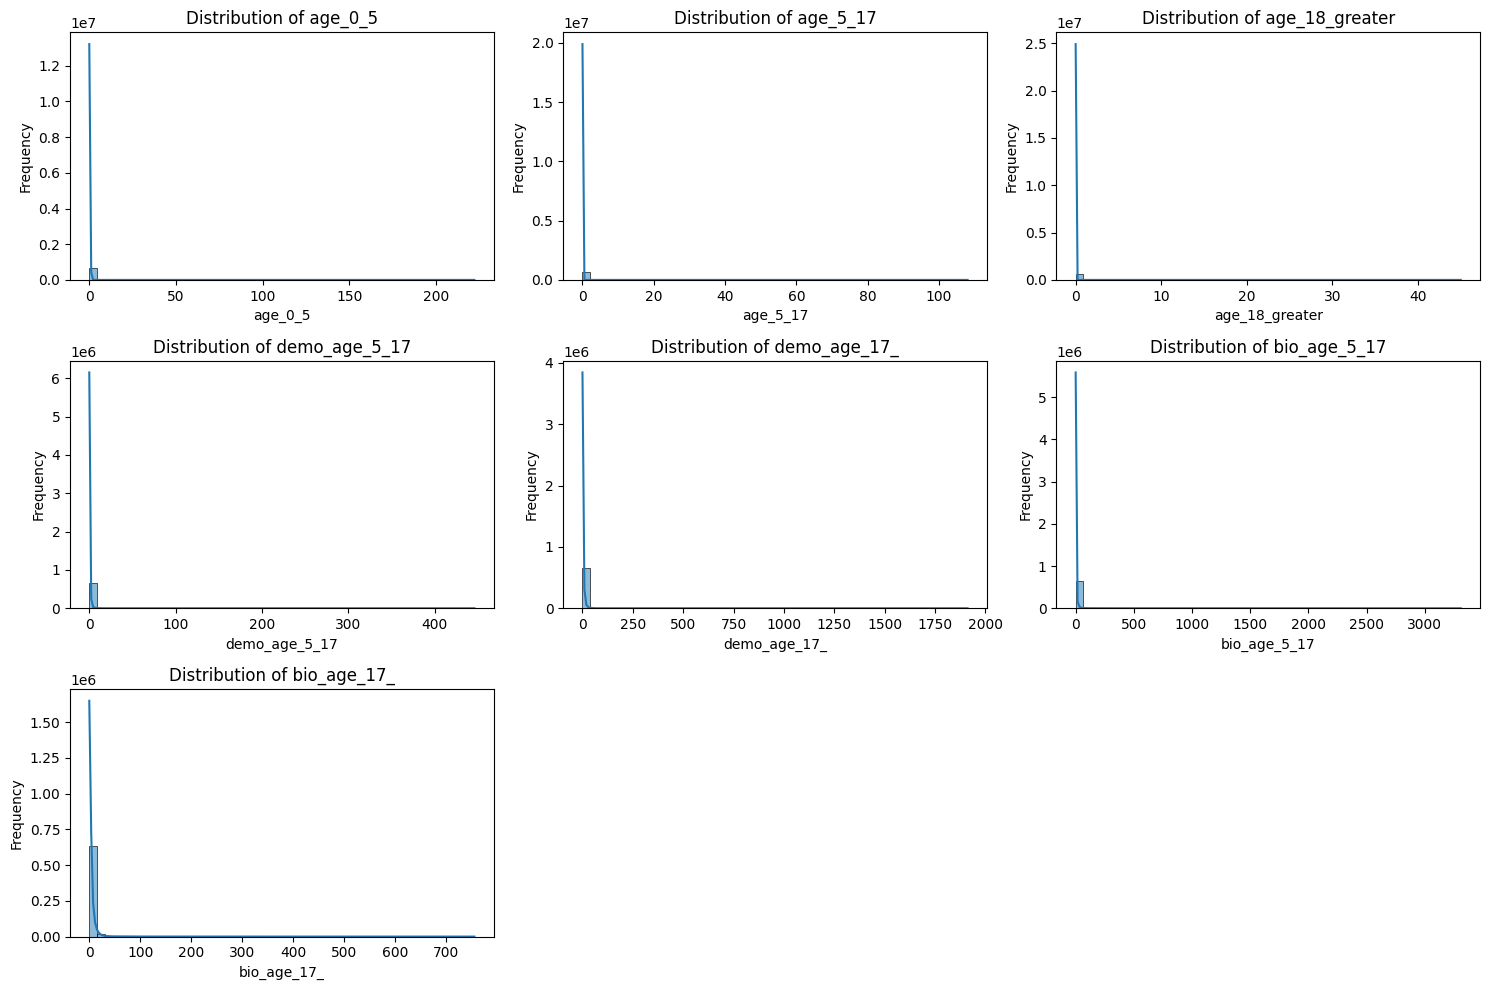

Histograms for numerical columns displayed.


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical columns displayed.")

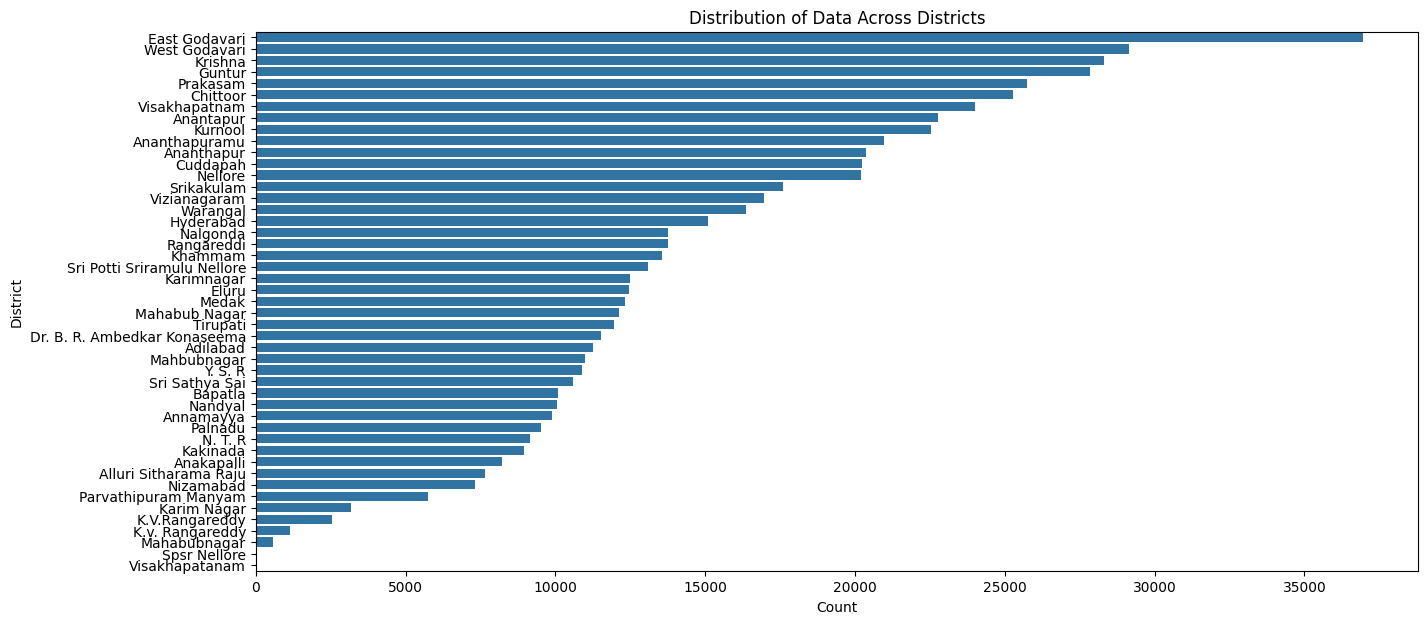

Count plot for 'district' displayed.


In [31]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.countplot(data=df_merged, y='district', order=df_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' displayed.")

**BIVARIATE AND TRIVARIATE ANALYSIS**

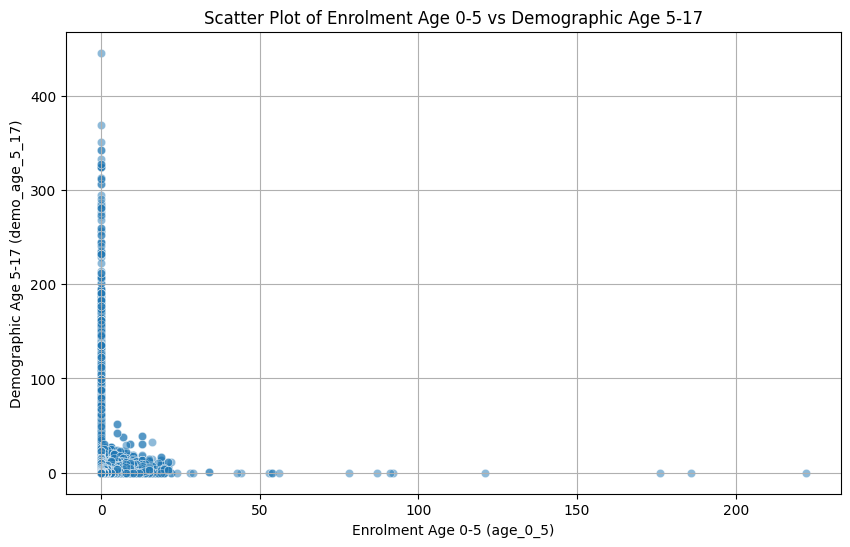

Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Insight: There appears to be a weak positive correlation between 'age_0_5' and 'demo_age_5_17', though many data points are clustered at the lower ends of both variables.")

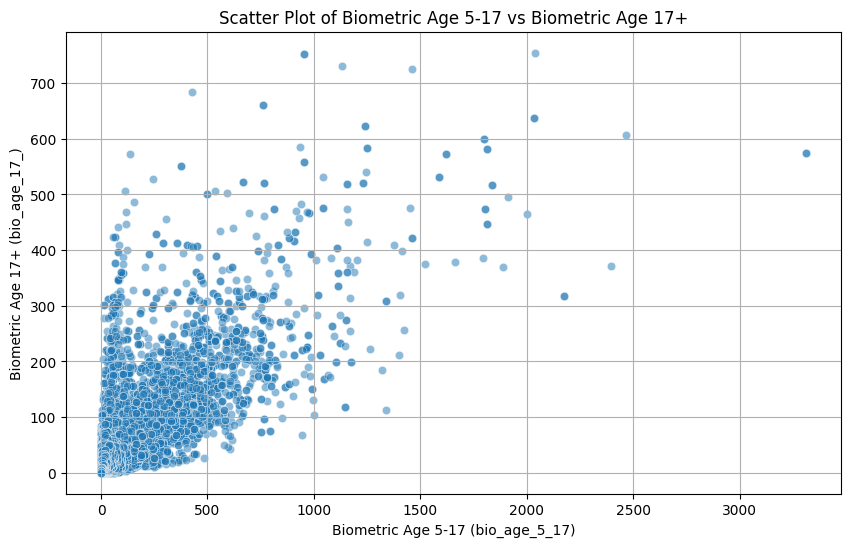

Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Insight: The scatter plot reveals a positive correlation between 'bio_age_5_17' and 'bio_age_17_', indicating that higher biometric counts in one age group often correspond to higher counts in the other.")

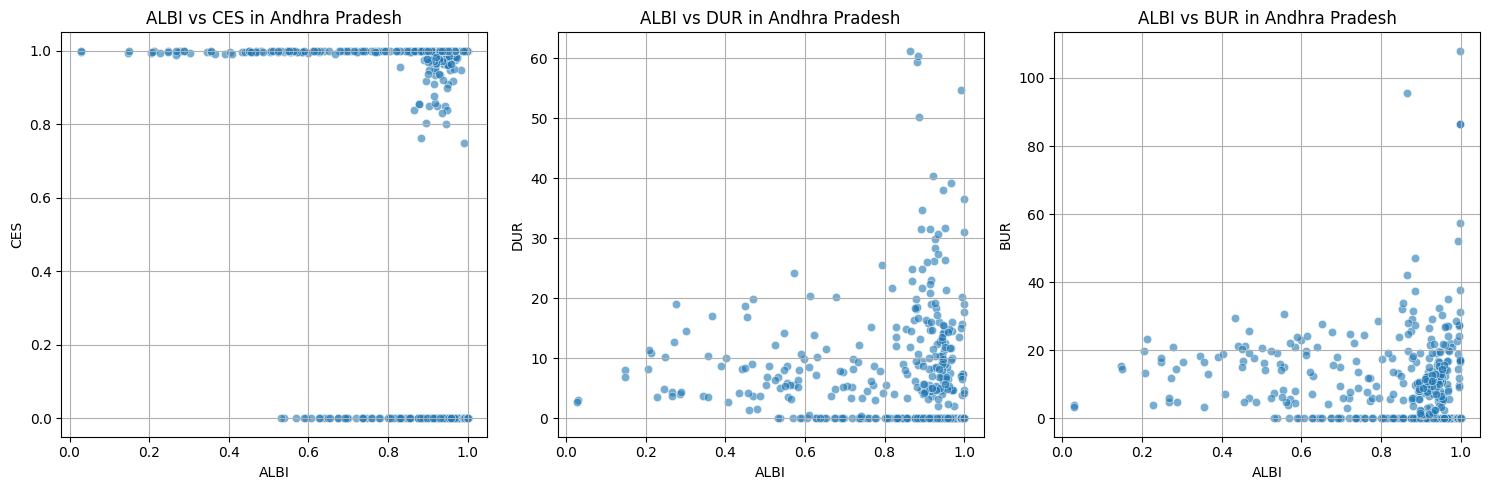

In [34]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_ap_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Andhra Pradesh')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

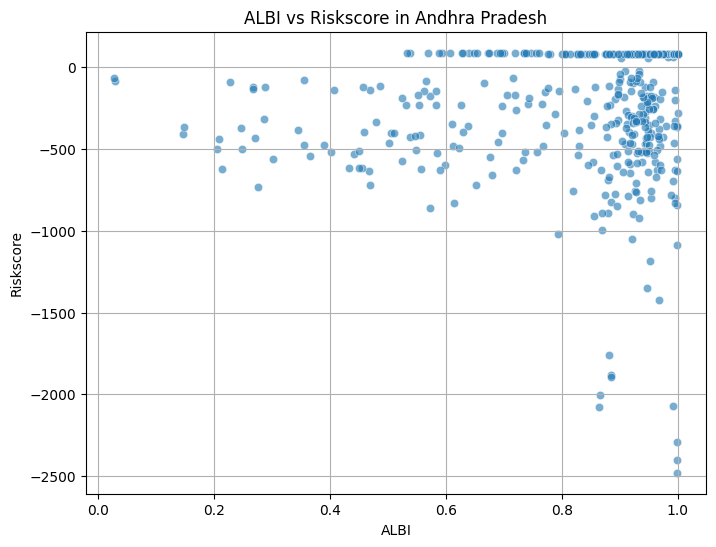

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.


In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ap_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Andhra Pradesh')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Arunachal Pradesh.")

Correlation Matrix:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.476922        0.352892       0.040350   
age_5_17        0.476922  1.000000        0.595003       0.006239   
age_18_greater  0.352892  0.595003        1.000000       0.000637   
demo_age_5_17   0.040350  0.006239        0.000637       1.000000   
demo_age_17_    0.037102  0.006106        0.000917       0.901680   
bio_age_5_17    0.029784  0.010274       -0.001465       0.320182   
bio_age_17_     0.036820  0.013248       -0.002677       0.302033   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.037102      0.029784     0.036820  
age_5_17            0.006106      0.010274     0.013248  
age_18_greater      0.000917     -0.001465    -0.002677  
demo_age_5_17       0.901680      0.320182     0.302033  
demo_age_17_        1.000000      0.348047     0.371104  
bio_age_5_17        0.348047      1.000000     0.789473  
bio_age_17_         0

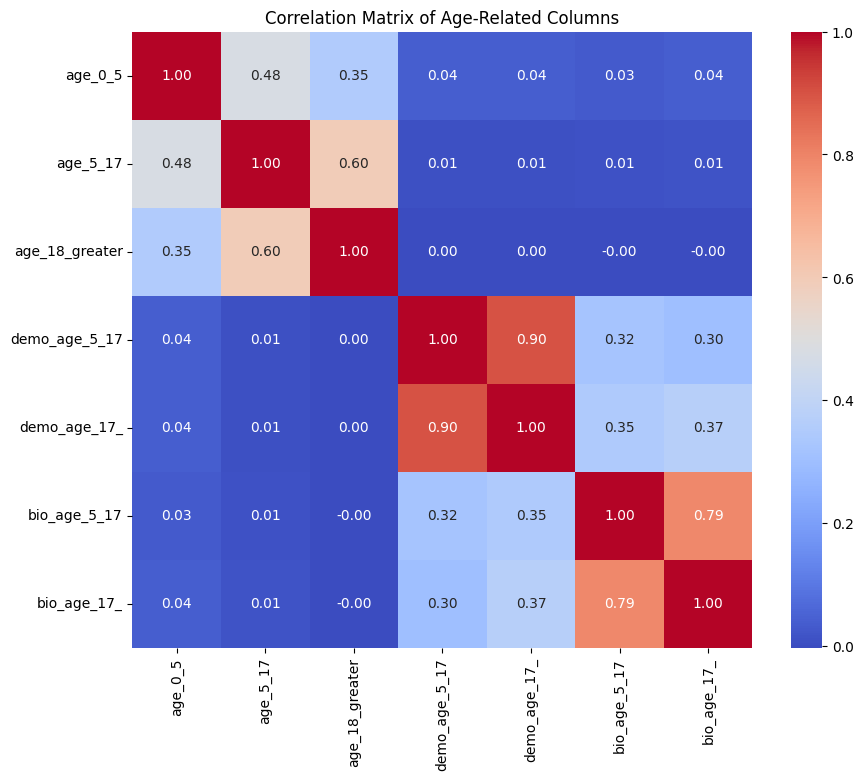

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [36]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix = df_merged[numerical_age_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

In [37]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_district_mean = df_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data:")
print(df_district_mean.head())
print(df_district_mean.info())

District-wise average age-related data:
                district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0               Adilabad  0.185520  0.053589        0.000177       0.228906   
1  Alluri Sitharama Raju  0.246275  0.032941        0.006797       0.251895   
2             Anakapalli  0.105832  0.002916        0.002552       0.276063   
3              Anantapur  0.330142  0.036058        0.000088       0.407703   
4             Ananthapur  0.157647  0.017189        0.000000       0.542088   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      2.928489      1.596309     6.319226  
1      1.779869      1.929281     2.766797  
2      1.892588      0.813366     1.524666  
3      3.195573      2.234442     4.644912  
4      1.277871      4.320450     1.857381  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        47

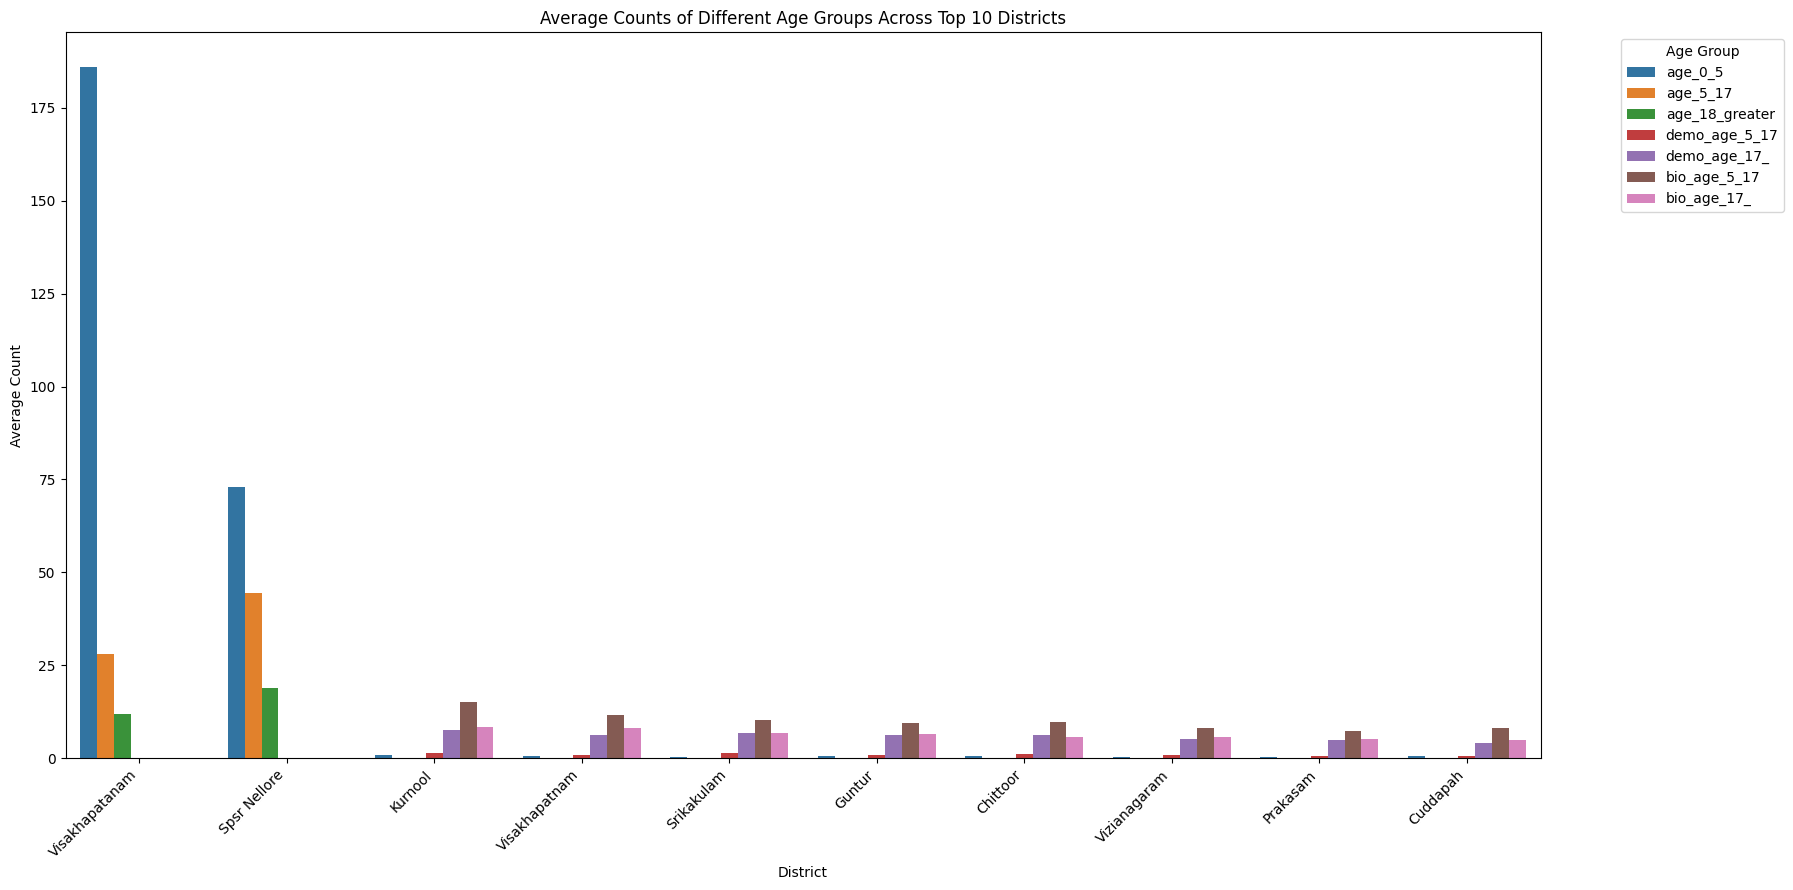

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [38]:
df_district_mean['total_avg_age'] = df_district_mean[age_cols_to_group].sum(axis=1)
df_district_mean_top10 = df_district_mean.nlargest(10, 'total_avg_age')

df_district_mean_melted = df_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        42308.0      405702.0   
1 2025-03-20     43.0      44.0            29.0            0.0           0.0   
2 2025-04-01      0.0       0.0             0.0         8017.0       50492.0   
3 2025-05-01      0.0       0.0             0.0        24476.0      131936.0   
4 2025-05-20      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0      290593.0     188126.0  
1           0.0          0.0  
2      471611.0     161452.0  
3      376573.0     177371.0  
4        9078.0       5951.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            232 non-null    datetime64[ns]
 1   a

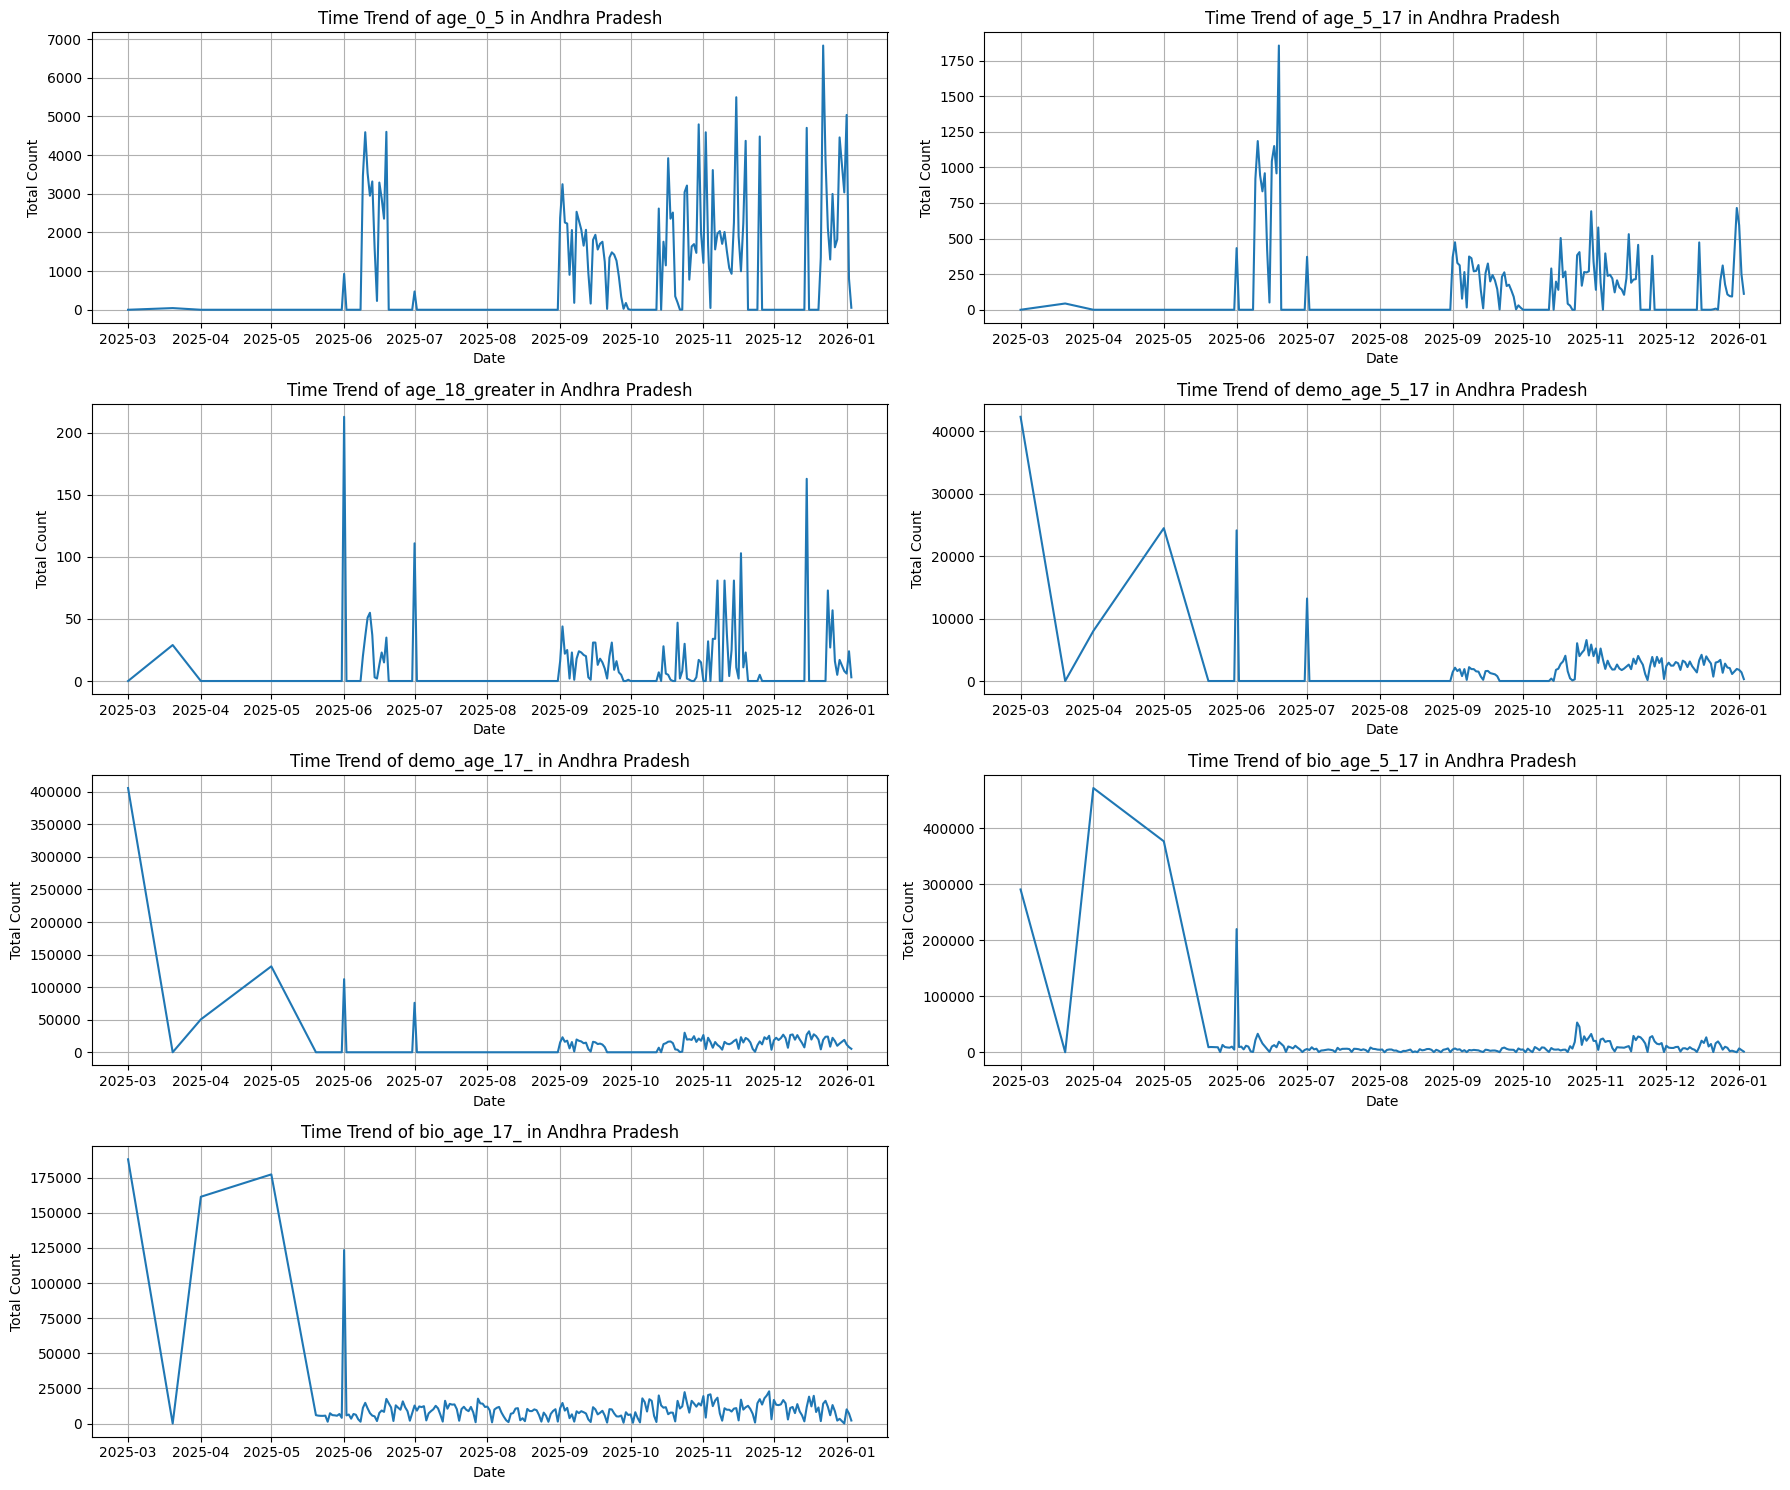

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [43]:
df_time_trend = df_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_time_trend.head())
print(df_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Andhra Pradesh')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

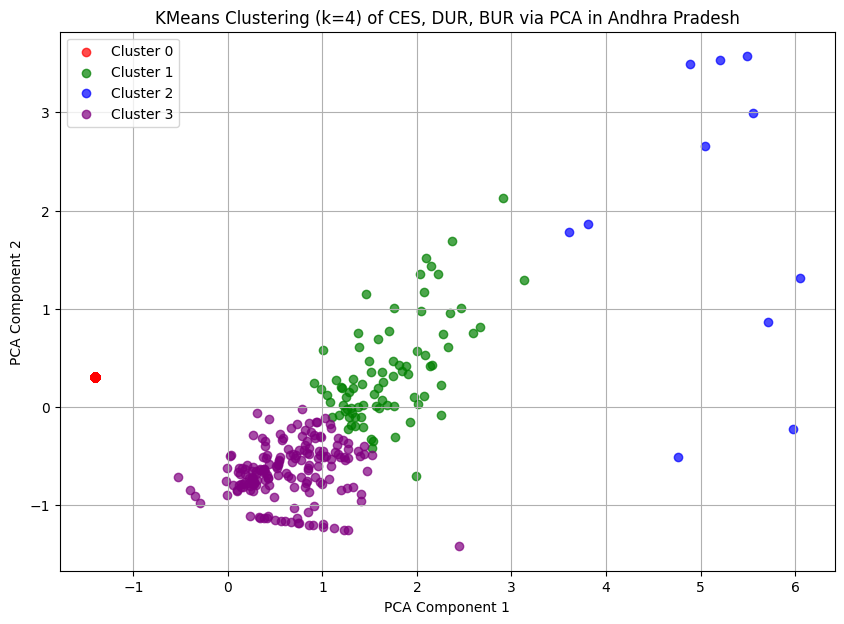

First 5 rows of df_ap_agg with 'clusterlabel' column:
   year  month           state               district  age_0_5  age_5_17  \
0  2025      3  Andhra Pradesh               Adilabad      0.0       0.0   
1  2025      3  Andhra Pradesh  Alluri Sitharama Raju      0.0       0.0   
2  2025      3  Andhra Pradesh             Anakapalli      0.0       0.0   
3  2025      3  Andhra Pradesh              Anantapur      0.0       0.0   
4  2025      3  Andhra Pradesh             Ananthapur      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0          457.0        5481.0        1000.0  ...  0.075605   
1             0.0          408.0        3291.0         768.0  ...  0.037327   
2             0.0          272.0        2061.0         233.0  ...  0.006835   
3             0.0          868.0       16988.0        3417.0  ...  0.131524   
4             0.0         2143.0        7027.0       14548.0  ...  0.224875   

    stdnorm   

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_ap_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_ap_agg
df_ap_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_ap_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA in Andhra Pradesh') # Modified title
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_ap_agg with 'clusterlabel' column:")
print(df_ap_agg.head())

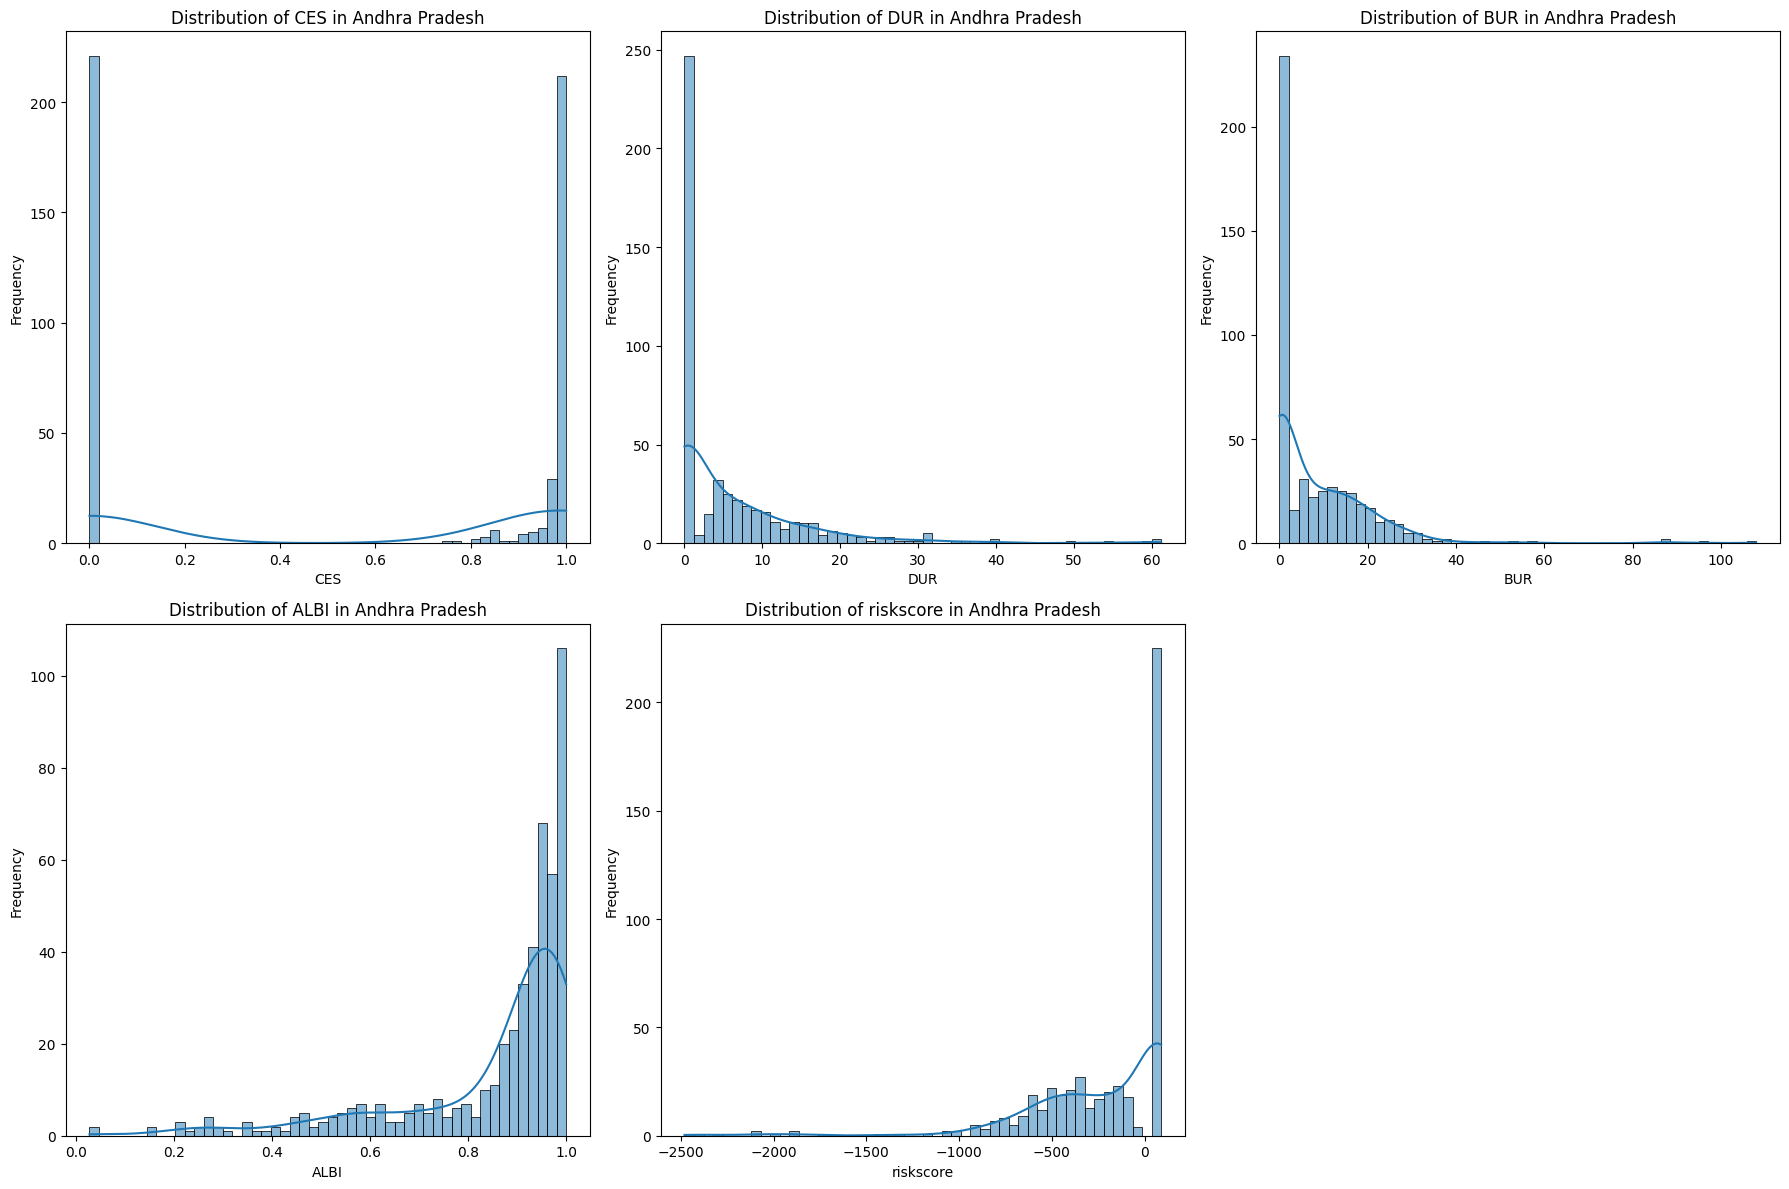

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.


In [45]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ap_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Andhra Pradesh')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed.")

In [42]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_ap_agg['year'].max()
latest_month = df_ap_agg[df_ap_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_ap_agg for the latest year and month
df_latest_month = df_ap_agg[(df_ap_agg['year'] == latest_year) & (df_ap_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
                    district  CES
                    Adilabad  1.0
       Alluri Sitharama Raju  1.0
                  Anakapalli  1.0
                  Ananthapur  1.0
               Ananthapuramu  1.0
               East Godavari  1.0
                       Eluru  1.0
Dr. B. R. Ambedkar Konaseema  1.0
                 Mahbubnagar  1.0
                    Nalgonda  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
                   district      CES
               Mahabubnagar 0.000000
            K.v. Rangareddy 0.000000
Sri Potti Sriramulu Nellore 0.936709
                    Khammam 0.954545
                    Bapatla 0.962963
                   Kakinada 0.970588
                  Annamayya 0.975610
                    N. T. R 0.978723
             Sri Sathya Sai 0.981818
                   Chittoor 0.987685

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026,

## Summary (Andhra Pradesh):

The Aadhaar lifecycle analysis for Andhra Pradesh provides a detailed view of enrolment and update activities across its districts. The `df_ap_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0. The data was then filtered for 'Andhra Pradesh' and aggregated monthly and by district into `df_ap_agg`.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some significantly negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within demographic (`demo_age_5_17` and `demo_age_17_`) and biometric (`bio_age_5_17` and `bio_age_17_`) update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Districts like Adilabad, Alluri Sitharama Raju, and Anakapalli showed a perfect CES of 1.0, suggesting all enrolments in these areas were for children. Conversely, Mahabubnagar and K.v. Rangareddy had a CES of 0.0, indicating no child enrolments were recorded during this period, while Sri Potti Sriramulu Nellore had a CES of 0.936709.
    *   **DUR (Demographic Update Rate)**: Warangal exhibited the highest DUR at 25.56, followed by Nalgonda at 21.785714. Districts like Mahabubnagar and K.v. Rangareddy registered a DUR of 0.0, suggesting no demographic updates relative to enrolments. Alluri Sitharama Raju had a DUR of 2.063492.
    *   **BUR (Biometric Update Rate)**: Warangal also led in BUR with 28.60, and Karim Nagar followed closely at 28.50. Similar to DUR, Mahabubnagar and K.v. Rangareddy showed a BUR of 0.0, while Sri Potti Sriramulu Nellore had a BUR of 0.848101.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Mahabubnagar achieved an ALBI of 1.0, with K.v. Rangareddy at 0.997483. Conversely, Kurnool showed a very low ALBI of 0.027862, and Guntur was at 0.029795, suggesting significant imbalance or low activity in these areas.
    *   **Risk Score**: K.v. Rangareddy had a risk score of 80.050344, and Mahabubnagar had 80.000000. However, some districts like Warangal (-1019.756900), Karim Nagar (-779.818044), and Nalgonda (-756.444066) exhibited significantly negative risk scores, highlighting the need to refine the risk score calculation to ensure it yields meaningful positive values within a defined range.

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics. The PCA visualization revealed these clusters spatially, providing insights into different operational profiles and performance levels across Andhra Pradesh's districts.

### Conclusion:

Andhra Pradesh exhibits varied performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The consistent observation of problematic `riskscore` values across multiple districts necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.